In [115]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import timeit
import psutil
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Function to print CPU utilization
def print_cpu_utilization(stage_name):
    cpu_percent = psutil.cpu_percent(interval=1)
    print(f"CPU Utilization during {stage_name}: {cpu_percent}%")

# Start measuring overall time
start = timeit.default_timer()

# Load data and measure execution time
start_loading = timeit.default_timer()
data = pd.read_csv("california_housing.csv")
end_loading = timeit.default_timer()
data_loading_time = end_loading - start_loading
print(f'Data Loading Time: {data_loading_time:.4f} seconds')
print_cpu_utilization("data loading")

# Data cleaning
data.dropna(inplace=True)

# Apply one-hot encoding to the entire dataset
start_encoding = timeit.default_timer()
X_encoded = pd.get_dummies(data, columns=['ocean_proximity'], drop_first=True)
end_encoding = timeit.default_timer()
encoding_time = end_encoding - start_encoding
print(f'One-Hot Encoding Time: {encoding_time:.4f} seconds')
print_cpu_utilization("one-hot encoding")

# Separate features (X) and target (y) after encoding
X = X_encoded.drop(['median_house_value'], axis=1)
y = X_encoded['median_house_value']

# Split into train and test sets
start_split = timeit.default_timer()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
end_split = timeit.default_timer()
split_time = end_split - start_split
print(f'Data Splitting Time: {split_time:.4f} seconds')
print_cpu_utilization("data splitting")

# Random forest training
forest = RandomForestRegressor(n_estimators=100, random_state=0, n_jobs=-1)

# Measure the time for training (fit) in parallel mode (using multi-core CPU)
start_training = timeit.default_timer()
forest.fit(X_train, y_train)
end_training = timeit.default_timer()
train_time_parallel = end_training - start_training
print(f"Training Time (Parallel): {train_time_parallel:.4f} seconds")
print_cpu_utilization("training")

# Measure the time for predicting (predict) in parallel mode
start_prediction = timeit.default_timer()
y_pred_parallel = forest.predict(X_test)
end_prediction = timeit.default_timer()
predict_time_parallel = end_prediction - start_prediction
print(f"Prediction Time (Parallel): {predict_time_parallel:.4f} seconds")
print_cpu_utilization("prediction")

# Model scoring
start_scoring = timeit.default_timer()
forest.score(X_test, y_test)
end_scoring = timeit.default_timer()
scoring_time = end_scoring - start_scoring
print(f'Model Scoring Time: {scoring_time:.4f} seconds')
print_cpu_utilization("scoring")

# Calculate mae, mse and rmse to evaluate the model
mae_parallel = mean_absolute_error(y_test, y_pred_parallel)
print(f"Mean Absolute Error (Parallel): {mae_parallel:.4f}")

mse_parallel = mean_squared_error(y_test, y_pred_parallel)
print(f"Mean Squared Error (Parallel): {mse_parallel:.4f}")

rmse_parallel = mse_parallel ** .5
print(f"Root Mean Squared Error (Parallel): {rmse_parallel:.4f}")

# Stop measuring overall time
end = timeit.default_timer()
overall_time = end - start
print(f'Program Run Time: {overall_time:.4f} seconds')

# Measure CPU utilization at the end of the program
print_cpu_utilization("overall program execution")


Data Loading Time: 0.2148 seconds
CPU Utilization during data loading: 7.9%
One-Hot Encoding Time: 0.0862 seconds
CPU Utilization during one-hot encoding: 8.6%
Data Splitting Time: 0.0786 seconds
CPU Utilization during data splitting: 7.0%
Training Time (Parallel): 9.1155 seconds
CPU Utilization during training: 4.5%
Prediction Time (Parallel): 0.1210 seconds
CPU Utilization during prediction: 6.4%
Model Scoring Time: 0.1220 seconds
CPU Utilization during scoring: 3.3%
Mean Absolute Error (Parallel): 32320.9687
Mean Squared Error (Parallel): 2472166173.4814
Root Mean Squared Error (Parallel): 49720.8827
Program Run Time: 16.0602 seconds
CPU Utilization during overall program execution: 4.7%


         Metric  Serial CPU  Parallel CPU
0  Overall time     29.9171        8.9779


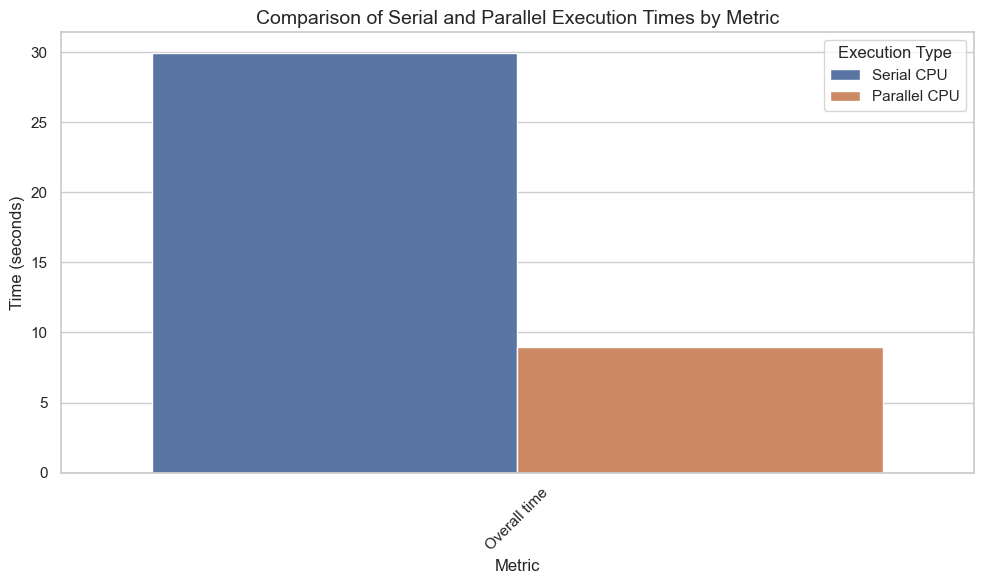

In [102]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data for the stages
data = {
    "Metric": ["Overall time"],
    "Serial CPU": [29.9171],
    "Parallel CPU": [8.9779]
}

# Create a DataFrame from the data
df = pd.DataFrame(data)

# Plotting the comparison using seaborn
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Melt the DataFrame to long format for easier plotting
df_melted = df.melt(id_vars="Metric", var_name="Execution Type", value_name="Time (seconds)")
#
# Create a bar plot
sns.barplot(x="Metric", y="Time (seconds)", hue="Execution Type", data=df_melted)

print(df)
#
# sns.countplot(data=df, x='Overall time')
# Add plot labels and title
plt.title("Comparison of Serial and Parallel Execution Times by Metric", fontsize=14)
plt.xlabel("Metric", fontsize=12)
plt.ylabel("Time (seconds)", fontsize=12)
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()
# print(df_melted)

# , "Loading time", "Training time", "Scoring time", "Prediction time"
# , 0.0721, 30.9501, 0.2524, 0.3487
# , 0.0539, 7.1863, 0.0732, 0.0723

          Stage  Serial CPU  Parallel CPU
0  Loading time      0.0721        0.0539


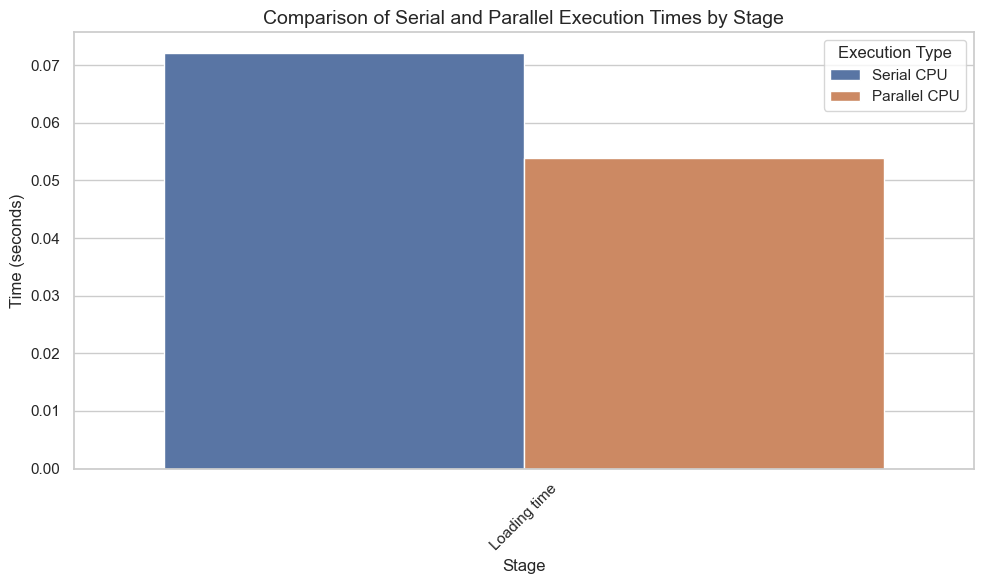

In [104]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data for the stages
data = {
    "Stage": ["Loading time"],
    "Serial CPU": [0.0721],
    "Parallel CPU": [0.0539]
}

# Create a DataFrame from the data
df = pd.DataFrame(data)

# Plotting the comparison using seaborn
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Melt the DataFrame to long format for easier plotting
df_melted = df.melt(id_vars="Stage", var_name="Execution Type", value_name="Time (seconds)")
#
# Create a bar plot
sns.barplot(x="Stage", y="Time (seconds)", hue="Execution Type", data=df_melted)

print(df)
#
# sns.countplot(data=df, x='Overall time')
# Add plot labels and title
plt.title("Comparison of Serial and Parallel Execution Times by Stage", fontsize=14)
plt.xlabel("Stage", fontsize=12)
plt.ylabel("Time (seconds)", fontsize=12)
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()
# print(df_melted)

# , "Loading time", "Training time", "Scoring time", "Prediction time"
# , 0.0721, 30.9501, 0.2524, 0.3487
# , 0.0539, 7.1863, 0.0732, 0.0723

           Stage  Serial CPU  Parallel CPU
0  Training time     30.9501        7.1863


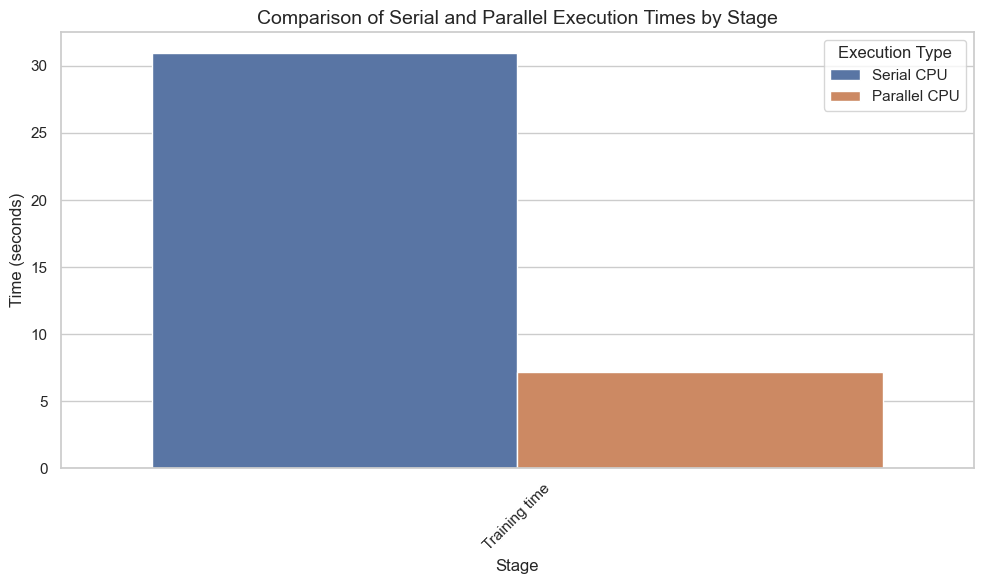

In [106]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data for the stages
data = {
    "Stage": ["Training time"],
    "Serial CPU": [30.9501],
    "Parallel CPU": [7.1863]
}

# Create a DataFrame from the data
df = pd.DataFrame(data)

# Plotting the comparison using seaborn
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Melt the DataFrame to long format for easier plotting
df_melted = df.melt(id_vars="Stage", var_name="Execution Type", value_name="Time (seconds)")
#
# Create a bar plot
sns.barplot(x="Stage", y="Time (seconds)", hue="Execution Type", data=df_melted)

print(df)
#
# sns.countplot(data=df, x='Overall time')
# Add plot labels and title
plt.title("Comparison of Serial and Parallel Execution Times by Stage", fontsize=14)
plt.xlabel("Stage", fontsize=12)
plt.ylabel("Time (seconds)", fontsize=12)
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()
# print(df_melted)

# , "Loading time", "Training time", "Scoring time", "Prediction time"
# , 0.0721, 30.9501, 0.2524, 0.3487
# , 0.0539, 7.1863, 0.0732, 0.0723

          Stage  Serial CPU  Parallel CPU
0  Scoring time      0.2524        0.0732


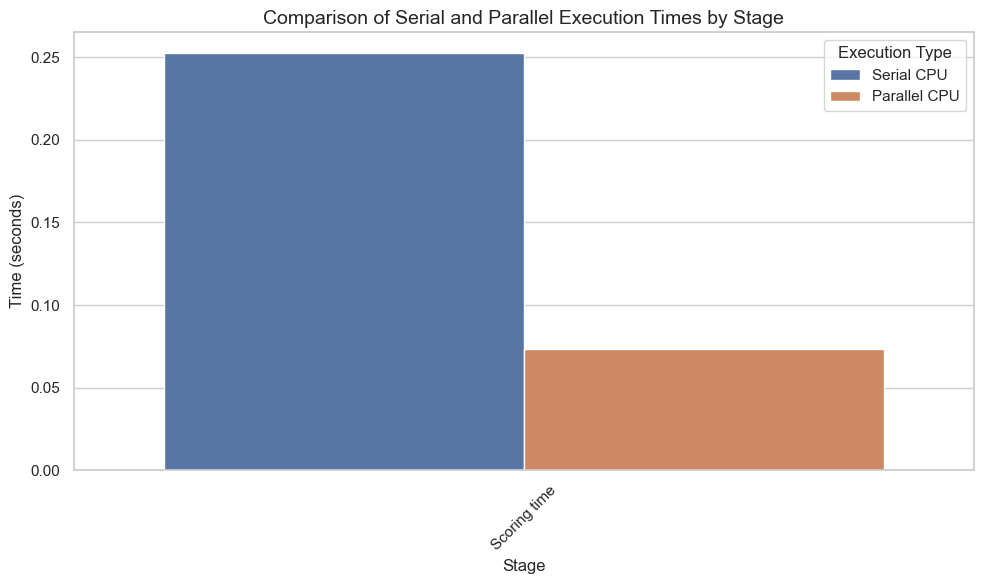

In [108]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data for the stages
data = {
    "Stage": ["Scoring time"],
    "Serial CPU": [0.2524],
    "Parallel CPU": [0.0732]
}

# Create a DataFrame from the data
df = pd.DataFrame(data)

# Plotting the comparison using seaborn
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Melt the DataFrame to long format for easier plotting
df_melted = df.melt(id_vars="Stage", var_name="Execution Type", value_name="Time (seconds)")
#
# Create a bar plot
sns.barplot(x="Stage", y="Time (seconds)", hue="Execution Type", data=df_melted)

print(df)
#
# sns.countplot(data=df, x='Overall time')
# Add plot labels and title
plt.title("Comparison of Serial and Parallel Execution Times by Stage", fontsize=14)
plt.xlabel("Stage", fontsize=12)
plt.ylabel("Time (seconds)", fontsize=12)
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()
# print(df_melted)

# , "Loading time", "Training time", "Scoring time", "Prediction time"
# , 0.0721, 30.9501, 0.2524, 0.3487
# , 0.0539, 7.1863, 0.0732, 0.0723

             Stage  Serial CPU  Parallel CPU
0  Prediction time      0.3487        0.0723


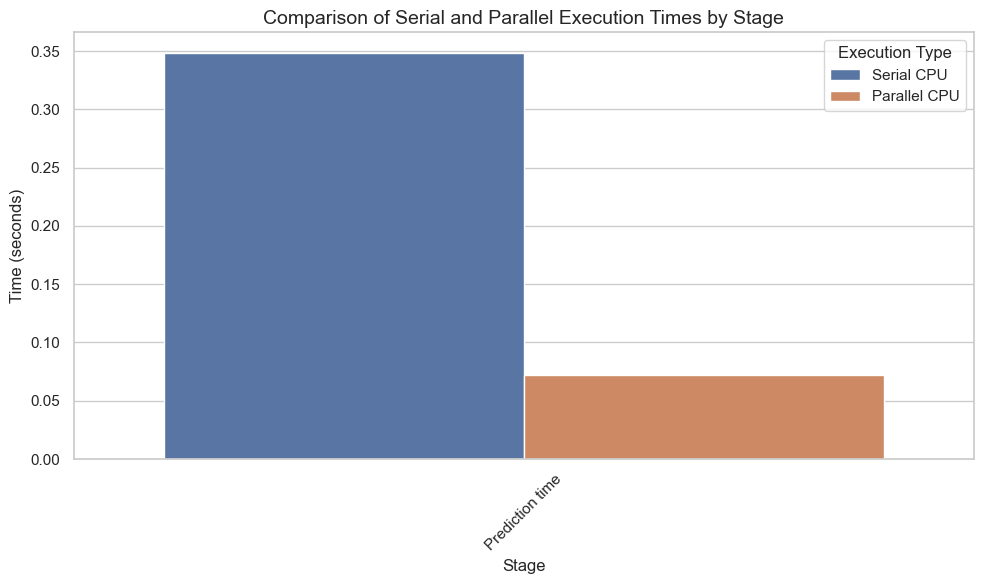

In [110]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data for the stages
data = {
    "Stage": ["Prediction time"],
    "Serial CPU": [0.3487],
    "Parallel CPU": [0.0723]
}

# Create a DataFrame from the data
df = pd.DataFrame(data)

# Plotting the comparison using seaborn
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Melt the DataFrame to long format for easier plotting
df_melted = df.melt(id_vars="Stage", var_name="Execution Type", value_name="Time (seconds)")
#
# Create a bar plot
sns.barplot(x="Stage", y="Time (seconds)", hue="Execution Type", data=df_melted)

print(df)
#
# sns.countplot(data=df, x='Overall time')
# Add plot labels and title
plt.title("Comparison of Serial and Parallel Execution Times by Stage", fontsize=14)
plt.xlabel("Stage", fontsize=12)
plt.ylabel("Time (seconds)", fontsize=12)
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()
# print(df_melted)

# , "Loading time", "Training time", "Scoring time", "Prediction time"
# , 0.0721, 30.9501, 0.2524, 0.3487
# , 0.0539, 7.1863, 0.0732, 0.0723